In [1]:
import pandas as pd

# Load the uploaded dataset
data = pd.read_csv('/content/renttherunway.csv')

# Preview the data
print(data.head())


   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

 Load the required libraries and read the dataset.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Check the first few samples, shape, and data info
print("First few samples of the dataset:")
print(data.head())
print("\nShape of the dataset:", data.shape)
print("\nDataset Information:")
print(data.info())


First few samples of the dataset:
   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                            

3. Check if there are any duplicate records in the dataset? If any, drop them


In [4]:
# Check for duplicate records
print("Number of duplicate records:", data.duplicated().sum())

# Drop duplicates
data = data.drop_duplicates()


Number of duplicate records: 0


4. Drop the columns which you think redundant for the analysis.(Hint: drop
columns like ‘id’,
‘review’)

In [11]:
# Drop unnecessary columns
print(data.columns)
# Check if columns exist before dropping
columns_to_drop = ['user_id', 'review_text']
data = data.drop([col for col in columns_to_drop if col in data.columns], axis=1)



Index(['Unnamed: 0', 'fit', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'body type', 'review_summary', 'category', 'height',
       'size', 'age', 'review_date'],
      dtype='object')
Index(['Unnamed: 0', 'fit', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'body type', 'review_summary', 'category', 'height',
       'size', 'age', 'review_date'],
      dtype='object')


Check the column 'weight'
, Is there any presence of string data? If yes, remove
the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [18]:
# Fill NaN values with the mean or another suitable value
data['weight'] = data['weight'].fillna(data['weight'].mean())

# Verify the result
print(data['weight'].head())
print(data['weight'].dtype)
# Convert to string, remove 'lbs', and convert to numeric
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

# Fill missing values
data['weight'] = data['weight'].fillna(data['weight'].mean())

# Verify the result
print(data['weight'].head())
print(data['weight'].dtype)



0    137.000000
1    132.000000
2    137.391709
3    135.000000
4    145.000000
Name: weight, dtype: float64
float64
0    137.000000
1    132.000000
2    137.391709
3    135.000000
4    145.000000
Name: weight, dtype: float64
float64


Check the unique categories for the column 'rented for' and group 'party:
cocktail' category with 'party'
.

In [19]:
# Check unique categories in 'rented for'
print("Unique categories before replacement:")
print(data['rented for'].unique())

# Replace 'party: cocktail' with 'party'
data['rented for'] = data['rented for'].replace('party: cocktail', 'party')

# Handle missing values
data['rented for'] = data['rented for'].fillna(data['rented for'].mode()[0])

# Verify the changes
print("Unique categories after replacement:")
print(data['rented for'].unique())


Unique categories before replacement:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']
Unique categories after replacement:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work']


The column 'height' is in feet with a quotation mark, Convert to inches with
float datatype.

In [20]:
print(data['height'].head())


0    5' 8"
1    5' 6"
2    5' 4"
3    5' 5"
4    5' 9"
Name: height, dtype: object


In [22]:
def height_to_inches(height):
    if isinstance(height, str):  # Ensure the value is a string
        feet, inches = height.split("'")
        return int(feet) * 12 + int(inches.replace('"', ''))
    return np.nan  # Return NaN if the value is not a string


In [23]:
data['height'] = data['height'].apply(height_to_inches)

# Fill missing values with the mean height
data['height'] = data['height'].fillna(data['height'].mean())


In [24]:
print(data['height'].head())
print(data['height'].dtype)


0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64
float64


In [25]:
# Function to convert height to inches
def height_to_inches(height):
    if isinstance(height, str):  # Ensure the value is a string
        feet, inches = height.split("'")
        return int(feet) * 12 + int(inches.replace('"', ''))
    return np.nan  # Return NaN if the value is not a string

# Apply the function to the 'height' column
data['height'] = data['height'].apply(height_to_inches)

# Handle missing values
data['height'] = data['height'].fillna(data['height'].mean())

# Verify the result
print(data['height'].head())
print(data['height'].dtype)


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: height, dtype: float64
float64


Check for missing values in each column of the dataset? If it exists, impute
them with appropriate methods.

In [31]:
# Check for missing values in each column
print("Missing values in each column:")
print(data.isnull().sum())
# Fill missing values in numerical columns with the mean
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].mean())
    # Fill missing values in categorical columns with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values again
print("Missing values after imputation:")
print(data.isnull().sum())
# Check for missing values
print("Missing values in each column before imputation:")
print(data.isnull().sum())

# Impute missing values
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].mean())

# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify the result
print("Missing values in each column after imputation:")
print(data.isnull().sum())



Missing values in each column:
Unnamed: 0             0
fit                    0
bust size              0
item_id                0
weight                 0
rating                 0
rented for             0
body type              0
review_summary         0
category               0
height            192544
size                   0
age                    0
review_date            0
dtype: int64
Missing values after imputation:
Unnamed: 0             0
fit                    0
bust size              0
item_id                0
weight                 0
rating                 0
rented for             0
body type              0
review_summary         0
category               0
height            192544
size                   0
age                    0
review_date            0
dtype: int64
Missing values in each column before imputation:
Unnamed: 0             0
fit                    0
bust size              0
item_id                0
weight                 0
rating                 0
rented for 

Check the statistical summary for the numerical and categorical columns and
write your findings.

In [35]:
# Statistical summary for numerical columns
print("Statistical Summary for Numerical Columns:")
print(data.describe())

# Statistical summary for categorical columns
print("Statistical Summary for Categorical Columns:")
print(data.describe(include=['object']))

# Statistical summary for numerical columns
print("Statistical Summary for Numerical Columns:")
print(data.describe())

# Statistical summary for categorical columns
print("\nStatistical Summary for Categorical Columns:")
print(data.describe(include=['object']))




Statistical Summary for Numerical Columns:
          Unnamed: 0       item_id         weight         rating  height  \
count  192544.000000  1.925440e+05  192544.000000  192544.000000     0.0   
mean    96271.500000  1.045684e+06     137.391709       9.092371     NaN   
std     55582.809453  8.053148e+05      20.122771       1.429740     NaN   
min         0.000000  1.233730e+05      50.000000       2.000000     NaN   
25%     48135.750000  1.950760e+05     125.000000       8.000000     NaN   
50%     96271.500000  9.483960e+05     137.391709      10.000000     NaN   
75%    144407.250000  1.678888e+06     145.000000      10.000000     NaN   
max    192543.000000  2.966087e+06     300.000000      10.000000     NaN   

                size            age  
count  192544.000000  192544.000000  
mean       12.245175      33.871017  
std         8.494877       8.037969  
min         0.000000       0.000000  
25%         8.000000      29.000000  
50%        12.000000      32.000000  
75%   

Are there outliers present in the column age? If yes, treat them with the
appropriate method.

Lower Bound: 17.0, Upper Bound: 49.0
Number of outliers in 'age': 10254


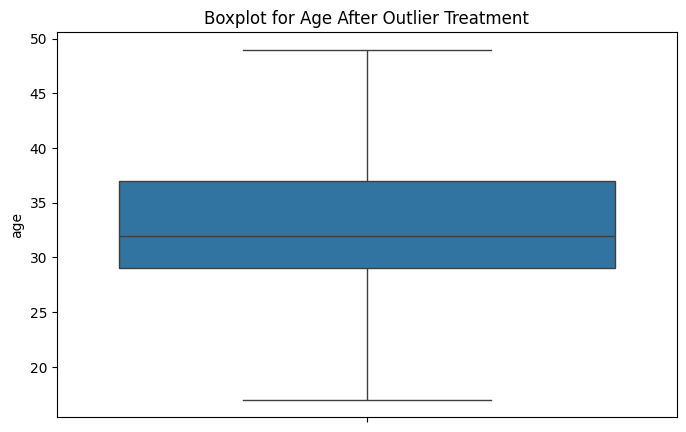

count    192544.000000
mean         33.517415
std           6.953420
min          17.000000
25%          29.000000
50%          32.000000
75%          37.000000
max          49.000000
Name: age, dtype: float64


In [39]:
# Detect outliers using the IQR method
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of outliers in 'age': {(data['age'] < lower_bound).sum() + (data['age'] > upper_bound).sum()}")

# Treat outliers by capping
data['age'] = np.where(data['age'] < lower_bound, lower_bound,
                       np.where(data['age'] > upper_bound, upper_bound, data['age']))

# Verify the result
plt.figure(figsize=(8, 5))
sns.boxplot(data['age'])
plt.title('Boxplot for Age After Outlier Treatment')
plt.show()

print(data['age'].describe())


Check the distribution of the different categories in the column 'rented for'
using appropriate plot.

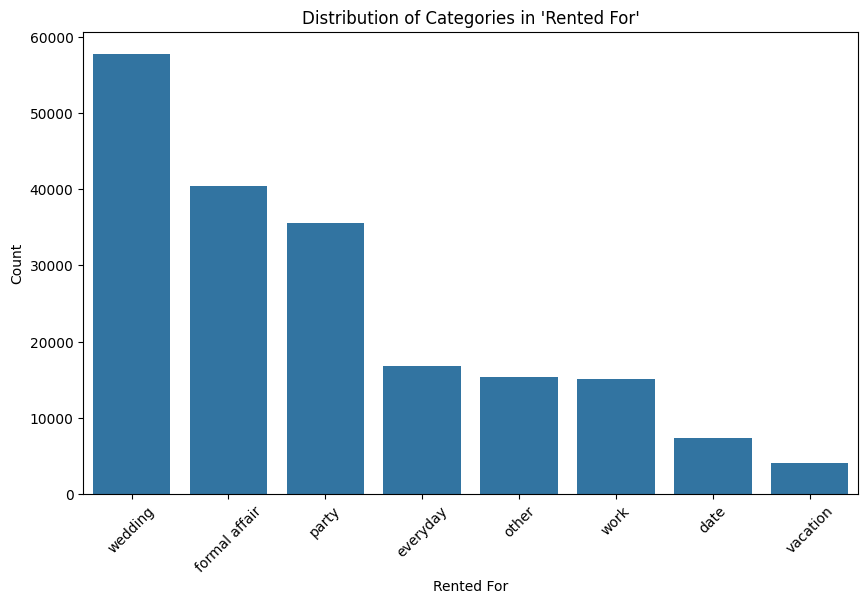

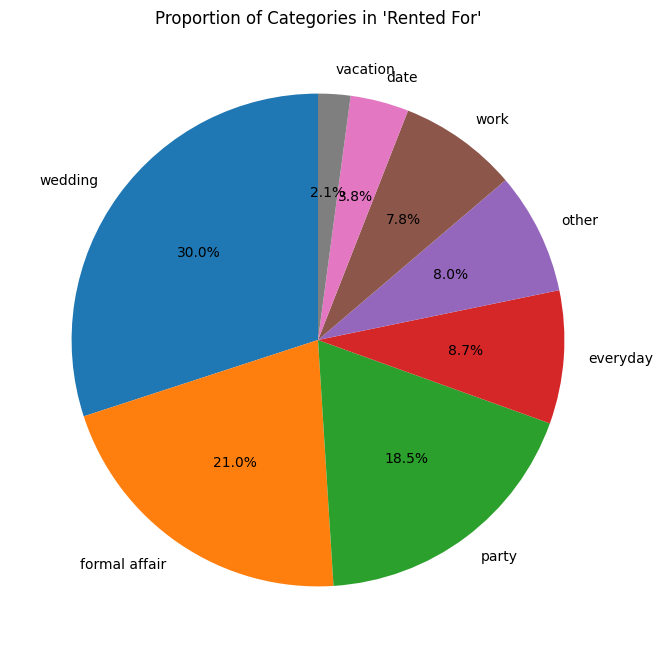

In [40]:
# Analyze and visualize the distribution of 'rented for'
category_counts = data['rented for'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Distribution of Categories in 'Rented For'")
plt.xlabel("Rented For")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Optional: Pie chart
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)
plt.title("Proportion of Categories in 'Rented For'")
plt.ylabel("")
plt.show()


Encode the categorical variables in the dataset.

In [41]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Label encode the categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Verify encoding
print(data.head())


Categorical columns: Index(['fit', 'bust size', 'rented for', 'body type', 'review_summary',
       'category', 'review_date'],
      dtype='object')
   Unnamed: 0  fit  bust size  item_id      weight  rating  rented for  \
0           0    0         39  2260466  137.000000    10.0           5   
1           1    0         37   153475  132.000000    10.0           3   
2           2    0         37  1063761  137.391709    10.0           4   
3           3    0         38   126335  135.000000     8.0           2   
4           4    0         37   616682  145.000000    10.0           6   

   body type  review_summary  category  height  size   age  review_date  
0          3          109621        44     NaN    14  28.0           77  
1          6           59681        20     NaN    12  36.0         1189  
2          3           74243        45     NaN     4  49.0          411  
3          4           28142        16     NaN     8  34.0          607  
4          1          140371       

Standardize the data, so that the values are within a particular range.

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify the standardization
print("Mean after standardization:")
print(data[numerical_cols].mean())

print("\nStandard deviation after standardization:")
print(data[numerical_cols].std())


Mean after standardization:
Unnamed: 0        8.502423e-17
fit               3.276975e-17
bust size        -1.341789e-16
item_id          -5.166403e-17
weight           -1.915112e-15
rating            1.591990e-16
rented for       -5.301098e-17
body type        -1.276840e-16
review_summary   -4.553815e-17
category          7.321531e-17
height                     NaN
size              4.339778e-17
age               1.040108e-16
review_date      -1.217241e-16
dtype: float64

Standard deviation after standardization:
Unnamed: 0        1.000003
fit               1.000003
bust size         1.000003
item_id           1.000003
weight            1.000003
rating            1.000003
rented for        1.000003
body type         1.000003
review_summary    1.000003
category          1.000003
height                 NaN
size              1.000003
age               1.000003
review_date       1.000003
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Apply PCA on the above dataset and determine the number of PCA
components to be used so that 90-95% of the variance in data is explained by
the same.

Missing values after imputation:
Unnamed: 0        0
fit               0
bust size         0
item_id           0
weight            0
rating            0
rented for        0
body type         0
review_summary    0
category          0
size              0
age               0
review_date       0
dtype: int64


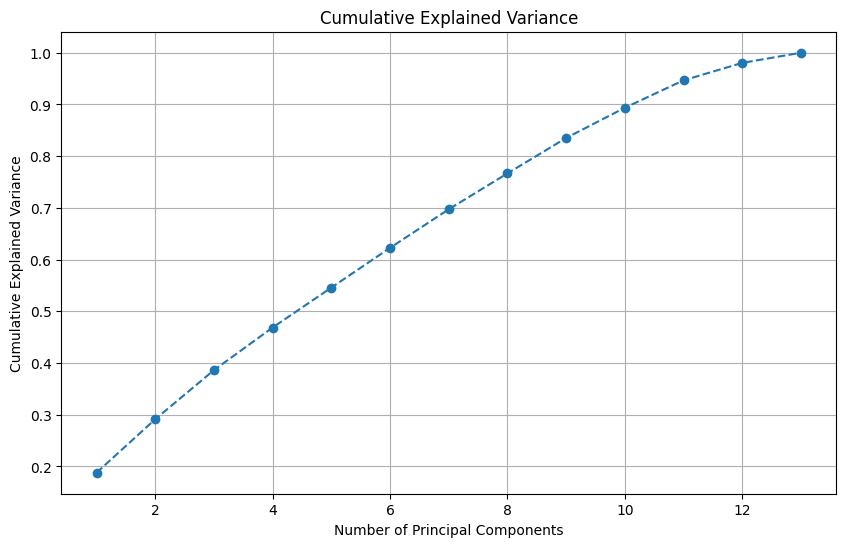

Number of components explaining 90% variance: 11
Shape of reduced data: (192544, 11)


In [49]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Drop the 'height' column due to all NaN values
data = data.drop('height', axis=1)

# Step 2: Impute missing values
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Step 3: Verify no missing values remain
print("Missing values after imputation:")
print(data.isnull().sum())

# Step 4: Apply PCA
# Initialize PCA
pca = PCA()
pca_data = pca.fit_transform(data)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components explaining 90-95% variance
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components explaining 90% variance: {num_components}")

# Step 5: Reduce dimensions using the optimal number of components
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(data)

# Verify the shape of the reduced data
print(f"Shape of reduced data: {reduced_data.shape}")


Apply K-means clustering and segment the data. (You may use original
data or PCA transformed data)
a. Find the optimal K Value using elbow plot for K Means clustering.
b. Build a Kmeans clustering model using the obtained optimal K value
from the elbow plot.
c. Compute silhouette score for evaluating the quality of the K Means
clustering technique.

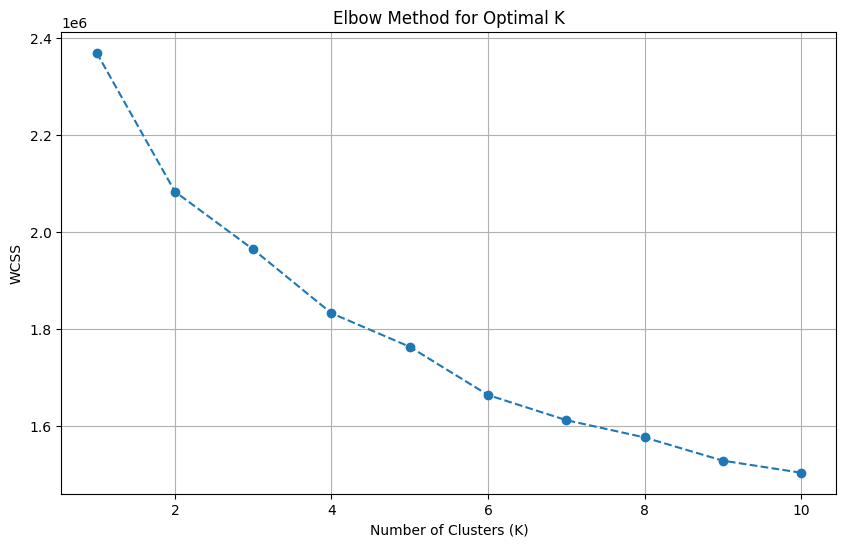

Silhouette Score for K-Means with 4 clusters: 0.08652322830544143


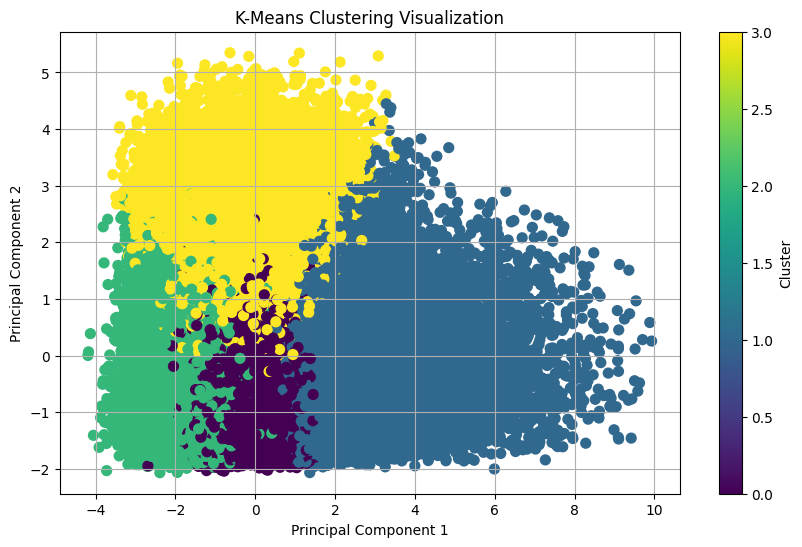

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Find the optimal number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)  # Use PCA-transformed data or original data
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Step 2: Choose the optimal K
optimal_k = 4  # Adjust based on elbow plot

# Step 3: Build the K-Means clustering model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)  # Use PCA-transformed data or original data

# Step 4: Compute the silhouette score
silhouette_avg = silhouette_score(reduced_data, kmeans_labels)
print(f"Silhouette Score for K-Means with {optimal_k} clusters: {silhouette_avg}")

# Step 5: Visualize the clusters (if 2D PCA data)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


Apply Agglomerative clustering and segment the data. (You may use
original data or PCA transformed data)
a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import random
import matplotlib.pyplot as plt

# Step 1: Load and process data
data = pd.read_csv('/content/renttherunway.csv')  # Replace with your file
data = pd.get_dummies(data, drop_first=True)  # One-hot encoding
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Reduce dimensions using PCA
pca = PCA(n_components=2)  # Use 2 components to speed up
reduced_data = pca.fit_transform(data_scaled)

# Step 3: Take a small random sample for clustering
sample_size = 1000  # Smaller subset of data
sampled_indices = random.sample(range(len(reduced_data)), sample_size)
sampled_data = reduced_data[sampled_indices]

# Step 4: Apply MiniBatchKMeans for faster clustering
optimal_k = 4  # Assume you've determined this earlier (use elbow or silhouette)
kmeans = MiniBatchKMeans(n_clusters=optimal_k, n_init=10, random_state=42, batch_size=100)
kmeans_labels = kmeans.fit_predict(sampled_data)

# Step 5: Compute silhouette score
silhouette_avg = silhouette_score(sampled_data, kmeans_labels)
print(f"Silhouette Score for MiniBatchKMeans with {optimal_k} clusters: {silhouette_avg}")

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('MiniBatch KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


17. Perform cluster analysis by doing bivariate analysis between cluster labels
and different features and write your conclusion on the results.

In [1]:
# Assuming 'agg_labels' or 'kmeans_labels' is your cluster label column
# Add cluster labels to the original dataset
data['cluster'] = agg_labels  # Use your clustering labels (e.g., KMeans or Agglomerative)

# Check the first few rows to confirm the labels have been added
print(data.head())


NameError: name 'agg_labels' is not defined

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numerical features vs. cluster labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='age', data=data)  # Replace 'age' with the feature you're analyzing
plt.title('Boxplot: Age vs Cluster Labels')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Boxplot for another numerical feature
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='weight', data=data)  # Replace 'weight' with the feature you're analyzing
plt.title('Boxplot: Weight vs Cluster Labels')
plt.xlabel('Cluster')
plt.ylabel('Weight')
plt.show()


NameError: name 'data' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Histogram to show the distribution of a numerical feature within each cluster
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='cluster', multiple='stack', kde=True)
plt.title('Histogram: Age Distribution Across Clusters')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
